In [20]:
#lets laod the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report


In [21]:
#lets import the data
bank = pd.read_csv(r"G:\Data_science\LR\bank_data.csv")
bank


,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
bank.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [23]:
bank.isna().sum()


age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [24]:
bank.describe


<bound method NDFrame.describe of        age  default  balance  housing  loan  duration  campaign  pdays  \
0       58        0     2143        1     0       261         1     -1   
1       44        0       29        1     0       151         1     -1   
2       33        0        2        1     1        76         1     -1   
3       47        0     1506        1     0        92         1     -1   
4       33        0        1        0     0       198         1     -1   
...    ...      ...      ...      ...   ...       ...       ...    ...   
45206   51        0      825        0     0       977         3     -1   
45207   71        0     1729        0     0       456         2     -1   
45208   72        0     5715        0     0      1127         5    184   
45209   57        0      668        0     0       508         4     -1   
45210   37        0     2971        0     0       361         2    188   

       previous  poutfailure  ...  johousemaid  jomanagement  joretired  \
0 

In [25]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [26]:
#lets take the required data variables only remaining will be droped out
bank1 = bank.iloc[:,[0,2,5,6,7,8,31]]
bank1.columns


Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [27]:
bank1.isna().sum()


age         0
balance     0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [28]:
bank1.describe


<bound method NDFrame.describe of        age  balance  duration  campaign  pdays  previous  y
0       58     2143       261         1     -1         0  0
1       44       29       151         1     -1         0  0
2       33        2        76         1     -1         0  0
3       47     1506        92         1     -1         0  0
4       33        1       198         1     -1         0  0
...    ...      ...       ...       ...    ...       ... ..
45206   51      825       977         3     -1         0  1
45207   71     1729       456         2     -1         0  1
45208   72     5715      1127         5    184         3  1
45209   57      668       508         4     -1         0  0
45210   37     2971       361         2    188        11  0

[45211 rows x 7 columns]>

In [29]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   pdays     45211 non-null  int64
 5   previous  45211 non-null  int64
 6   y         45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


Text(0.5, 0, 'balance')

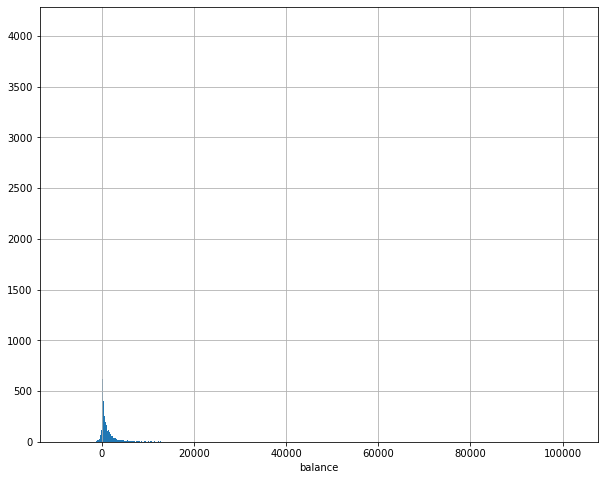

In [30]:
#Exploratory data anlysis
#histogram
plt.figure(figsize=(10, 8))
bank1.balance.hist(bins=bank1.balance.nunique())
plt.xlabel('balance')



In [14]:
import seaborn as sns 

cheacking for the count how many can make fixed diposite. 

<AxesSubplot:xlabel='y', ylabel='count'>

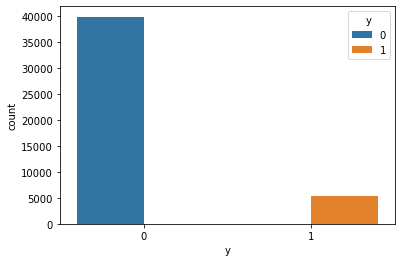

In [33]:
sns.countplot(x= bank.y, hue = "y", data=bank)

In [34]:
#count the number of rows for each type
bank.groupby('y').size()

y
0    39922
1     5289
dtype: int64

In [15]:
bank1.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [35]:
######## Model building 
import statsmodels.formula.api as sm
logit_model = sm.logit('y ~ age+balance+duration+campaign+pdays+previous', data = bank1).fit()


Optimization terminated successfully.
         Current function value: 0.293213
         Iterations 7


In [36]:
#summary
logit_model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.187     
Dependent Variable: y                AIC:              26526.9455
Date:               2022-07-17 17:42 BIC:              26587.9791
No. Observations:   45211            Log-Likelihood:   -13256.   
Df Model:           6                LL-Null:          -16315.   
Df Residuals:       45204            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -3.4952    0.0706  -49.5376  0.0000  -3.6335  -3.3569
age           0.0080    0.0015    5.4254  0.0000   0.0051   0.0109
balance       0.0000    0.0000    8.6625  0.0000   0.0000   0.0000
duration      0.0036    0.0001   64.4801  0.0000   0.0035   0.0037
campaign     -0.1288    0.0095  -13.5025  0.0000  -0.1475  -0.1101
pdays         0.0021    0.0002   13.7893  0.0000   0.0018   0.0024
previous      0.0860    0.0074   11.6692  0.0000   0.0715   0.1004
=================================================================

"""

In [37]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.1875
Time:                        17:42:30   Log-Likelihood:                -13256.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4952      0.071    -49.538      0.000      -3.633      -3.357
age            0.0080      0.001      5.425      0.000       0.005       0.011
balance     3.715e-05   4.29e-06      8.663      0.000    2.87e-05    4.56e-05
duration       0.0036   5.64e-05     64.480      0.000       0.004       0.004
campaign      -0.1288      0.010    -13.503      0.000      -0.148      -0.110
pdays          0.0021      0.000     13.789      0.000       0.002       0.002
previous       0.0860      0.007     11.669      0.000       0.072       0.100
==============================================================================
"""

In [38]:
pred = logit_model.predict(bank1.iloc[ :, :6])

In [39]:
#ROC
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(bank1.y, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.09467858011431242

In [40]:
import pylab as pl

i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
5022,0.250664,0.749291,0.749336,-0.000045,0.103363


[Text(-1000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(5000.0, 0, ''),
 Text(6000.0, 0, ''),
 Text(7000.0, 0, ''),
 Text(8000.0, 0, ''),
 Text(9000.0, 0, '')]

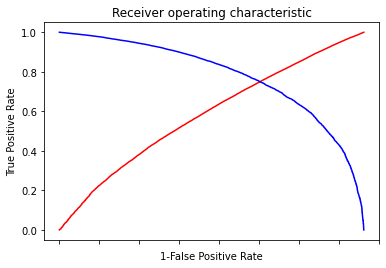

In [41]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [42]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.830361


In [43]:
# filling all the cells with zeroes
bank1["pred"] = np.zeros(45211)


C:\Users\Anjali\AppData\Local\Temp\ipykernel_228\2168060949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1["pred"] = np.zeros(45211)


In [44]:
# taking threshold value and above the prob value will be treated as correct value 
bank1.loc[pred > optimal_threshold, "pred"] = 1

In [45]:
# classification report
classification = classification_report(bank1["pred"], bank1["y"])
classification

'              precision    recall  f1-score   support\n\n         0.0       0.71      0.96      0.82     29634\n         1.0       0.79      0.27      0.40     15577\n\n    accuracy                           0.72     45211\n   macro avg       0.75      0.61      0.61     45211\nweighted avg       0.74      0.72      0.67     45211\n'

In [46]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank1, test_size = 0.3)

In [47]:
# Model building 
import statsmodels.formula.api as sm
model = sm.logit('y ~ age+balance+duration+campaign+pdays+previous', data = train_data).fit()


Optimization terminated successfully.
         Current function value: 0.293987
         Iterations 7


In [48]:
#summary
model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.194     
Dependent Variable: y                AIC:              18621.6422
Date:               2022-07-17 17:43 BIC:              18680.1790
No. Observations:   31647            Log-Likelihood:   -9303.8   
Df Model:           6                LL-Null:          -11541.   
Df Residuals:       31640            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -3.5213    0.0845  -41.6938  0.0000  -3.6868  -3.3558
age           0.0081    0.0018    4.6202  0.0000   0.0047   0.0115
balance       0.0000    0.0000    7.2509  0.0000   0.0000   0.0000
duration      0.0038    0.0001   55.0583  0.0000   0.0037   0.0039
campaign     -0.1306    0.0115  -11.3655  0.0000  -0.1531  -0.1080
pdays         0.0022    0.0002   11.8996  0.0000   0.0018   0.0025
previous      0.0831    0.0089    9.3100  0.0000   0.0656   0.1006
=================================================================

"""

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31640
Method:                           MLE   Df Model:                            6
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.1938
Time:                        17:43:20   Log-Likelihood:                -9303.8
converged:                       True   LL-Null:                       -11541.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5213      0.084    -41.694      0.000      -3.687      -3.356
age            0.0081      0.002      4.620      0.000       0.005       0.012
balance     3.557e-05   4.91e-06      7.251      0.000     2.6e-05    4.52e-05
duration       0.0038   6.88e-05     55.058      0.000       0.004       0.004
campaign      -0.1306      0.011    -11.366      0.000      -0.153      -0.108
pdays          0.0022      0.000     11.900      0.000       0.002       0.003
previous       0.0831      0.009      9.310      0.000       0.066       0.101
==============================================================================
"""

In [50]:
# Prediction on Test data set
test_pred = logit_model.predict(test_data)

In [51]:
# Creating new column for storing predicted class of Attorney
# filling all the cells with zeroes
test_data["test_pred"] = np.zeros(13564)

In [52]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 
test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

In [53]:
# confusion matrix 
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['y'])
confusion_matrix

y,0,1
test_pred,,
0.0,8578,326
1.0,3459,1201


In [54]:
accuracy_test = (8586 + 1227)/(13564) 
accuracy_test

0.7234591565909761

In [55]:
# classification report
classification_test = classification_report(test_data["test_pred"], test_data["y"])
classification_test

'              precision    recall  f1-score   support\n\n         0.0       0.71      0.96      0.82      8904\n         1.0       0.79      0.26      0.39      4660\n\n    accuracy                           0.72     13564\n   macro avg       0.75      0.61      0.60     13564\nweighted avg       0.74      0.72      0.67     13564\n'

In [56]:
#ROC CURVE AND AUC
fpr, tpr, threshold = metrics.roc_curve(test_data["y"], test_pred)

0.8260980292210783

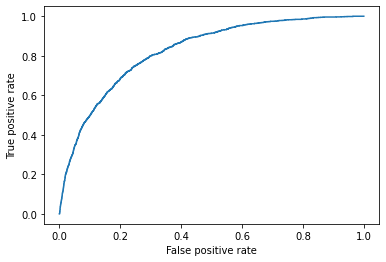

In [57]:
#PLOT OF ROC
plt.plot(fpr, tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

roc_auc_test = metrics.auc(fpr, tpr)
roc_auc_test

In [58]:
# prediction on train data
train_pred = model.predict(train_data.iloc[ :, :6])

In [59]:
# Creating new column 
# filling all the cells with zeroes
train_data["train_pred"] = np.zeros(31647)

In [60]:
# taking threshold value and above the prob value will be treated as correct value 
train_data.loc[train_pred > optimal_threshold, "train_pred"] = 1

In [61]:
# confusion matrix
confusion_matrx = pd.crosstab(train_data.train_pred, train_data['y'])
confusion_matrx

y,0,1
train_pred,,
0.0,19818,786
1.0,8067,2976


In [62]:
accuracy_train = (19657 + 2973)/(31647)
print(accuracy_train)

0.7150756785793282
